In [181]:
from sklearn.datasets import load_iris
import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

In [182]:
(X,y) = load_iris(return_X_y=True)

In [183]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [184]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [185]:
def get_categoria(indice):
	return y[indice]

In [186]:
def calcula_knn(p1,p2):
    return math.sqrt(np.sum((p1-p2)**2))

In [187]:
def sort_by_value(val): 
    return val[1]

In [188]:
def calcula_todos_knn(p1):
    diffs =[]
    for i,iris in enumerate(X):
        diffs.append([i,calcula_knn(p1,iris),get_categoria(i)])
    diffs.sort(key=sort_by_value)
    return diffs

In [189]:
def classificar(p1):
    diffs = calcula_todos_knn(p1)
    visinhos = diffs[0:5]
    
    categorias =[0,0,0]
    for v in visinhos:
        if v[2] == 0:
            categorias[0]+=1
        elif v[2] == 1:
            categorias[1]+=1
        else:
            categorias[2]+=1
            
    return [visinhos,np.argmax(categorias)]

In [190]:
data = classificar([5.2, 2. , 1.2, 1.3])
data

[[[41, 1.2609520212918492, 0],
  [45, 1.4832396974191326, 0],
  [1, 1.5297058540778354, 0],
  [25, 1.5524174696260025, 0],
  [23, 1.6093476939431082, 0]],
 0]

In [191]:
for d in data[0]:
    print(d[0],d[1])

41 1.2609520212918492
45 1.4832396974191326
1 1.5297058540778354
25 1.5524174696260025
23 1.6093476939431082


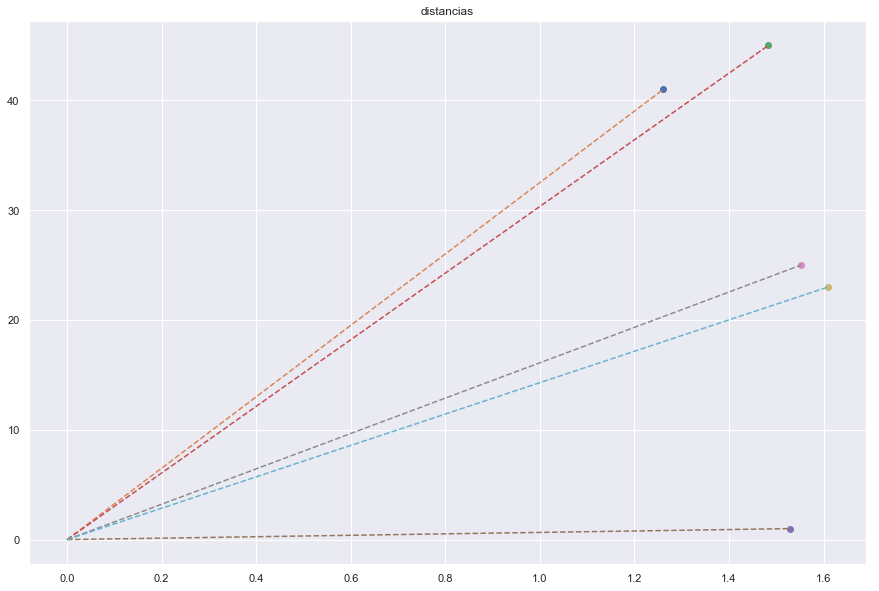

In [193]:
fig, ax = plt.subplots(figsize=(15,10))

for d in data[0]:
    ax.plot(d[1],d[0], 'o')
    plt.plot([0,d[1]],[0,d[0]], '--')
        
ax.set_title('distancias')
    
plt.show()